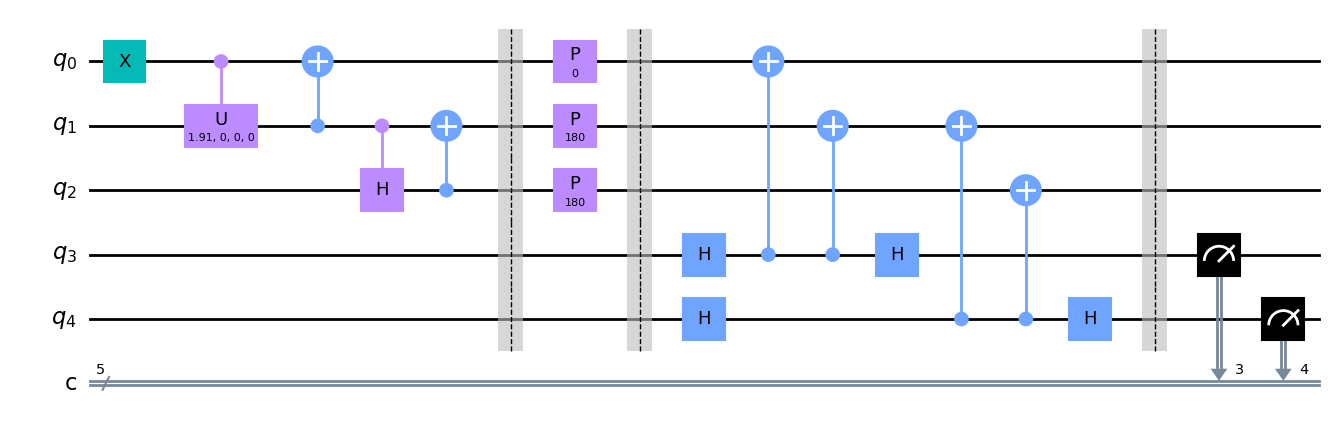

In [1]:
import qiskit
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit,transpile,Aer,IBMQ
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram,plot_bloch_multivector
from numpy.random import randint,random_integers
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error
import numpy as np
import random
aer_sim = Aer.get_backend('aer_simulator')


### Alice Setup
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.cu(1.91, 0, 0, 0, qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[0])
circuit.ch(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[1])
circuit.draw()

np.random.seed(seed=0)
n=3
phases=randint(2,size=n)
#print(phases)
phase_angle=[]
for i in range(n):
  if(phases[i]==0):
    phase_angle.append(0)
  else:
    phase_angle.append(180)
#print(phase_angle)
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.p(phase_angle[0], qreg_q[0])
circuit.p(phase_angle[1], qreg_q[1])
circuit.p(phase_angle[2], qreg_q[2])
circuit.draw()

circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.cx(qreg_q[3], qreg_q[0])
circuit.cx(qreg_q[3], qreg_q[1])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[4], qreg_q[1])
circuit.cx(qreg_q[4], qreg_q[2])
circuit.h(qreg_q[4])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])
circuit.draw()



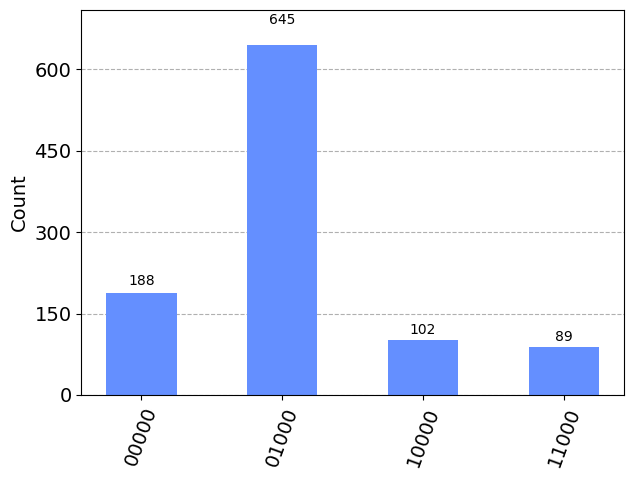

In [2]:
#simulator = Aer.get_backend('aer_simulator')
#circ = transpile(circuit, simulator)
#result = simulator.run(circ).result()

circ = transpile(circuit, aer_sim)
result = aer_sim.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u2', 'u1', 'measure', 'cx', 'u3', 'reset']
  All-qubits errors: ['reset', 'measure', 'u1', 'u2', 'u3', 'cx']


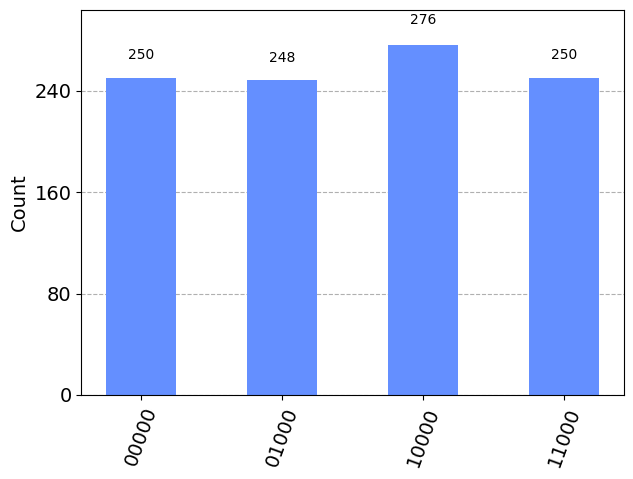

In [3]:
def get_noise(p_bit,p_phase,p_gate1,p_gate2):
    bit_flip = pauli_error([('X',p_bit), ('I', 1 - p_bit)])#bit flip
    #phase_flip = pauli_error([('Z', p_phase), ('I', 1 - p_phase)])#phase flip
    #bitphase_flip = phase_flip.compose(phase_flip)
    #error_gate1 = depolarizing_error(p_gate, 1)
    #error_gate2=amplitude_damping_error(p_gate, excited_state_population=0, canonical_kraus=True)
    #error_gate3=phase_damping_error(p_gate, canonical_kraus=True)
    #error_gate4=phase_amplitude_damping_error(p_gate1, p_gate2, excited_state_population=0, canonical_kraus=True)
    
    noise_model = NoiseModel()
    #noise_model.add_all_qubit_quantum_error(phase_flip, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(bit_flip, "measure") # measurement error is applied to measurements
    #noise_model.add_all_qubit_quantum_error(error_gate4, ["x","h"]) # single qubit gate error is applied to x gates
        
    return noise_model

/tmp/ipykernel_236/2033882136.py:21: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
/tmp/ipykernel_236/2033882136.py:21: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


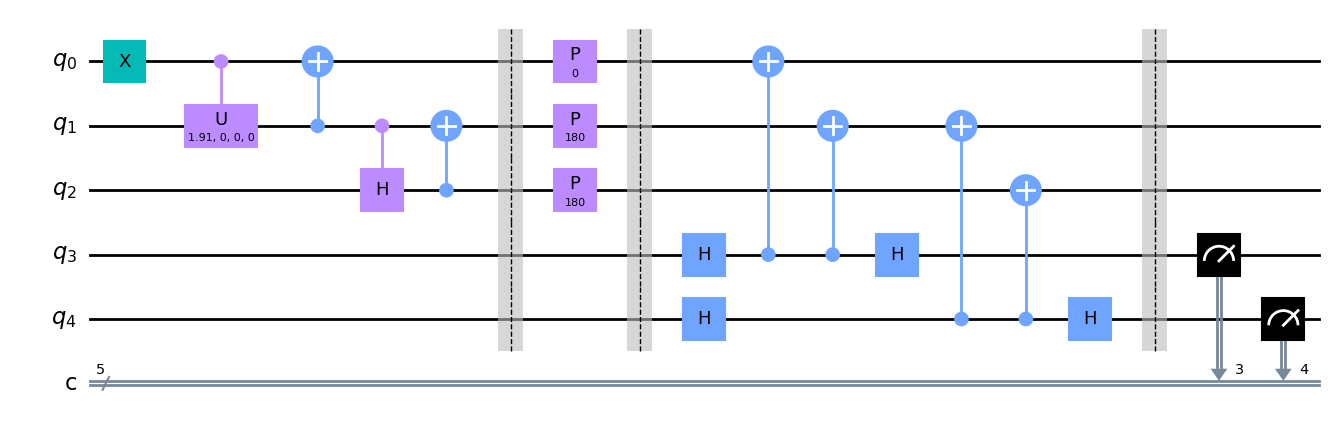

In [5]:
import qiskit
from qiskit.circuit import QuantumCircuit
from qiskit import providers,execute,QuantumRegister,ClassicalRegister,QuantumCircuit,transpile,Aer,assemble,IBMQ
from qiskit.tools import job_monitor
from qiskit import *
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram,plot_bloch_multivector
from numpy.random import randint,random_integers
from qiskit.providers.aer.noise import NoiseModel
import numpy as np
import socket
socket.socket
from socket import socket
import random
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error,amplitude_damping_error,phase_damping_error,phase_amplitude_damping_error
from qiskit.providers.aer.noise import thermal_relaxation_error
IBMQ.load_account()
provider=IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

aer_sim = Aer.get_backend('aer_simulator')

### Alice Setup
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit2 = QuantumCircuit(qreg_q, creg_c)

circuit2.x(qreg_q[0])
circuit2.cu(1.91, 0, 0, 0, qreg_q[0], qreg_q[1])
circuit2.cx(qreg_q[1], qreg_q[0])
circuit2.ch(qreg_q[1], qreg_q[2])
circuit2.cx(qreg_q[2], qreg_q[1])
circuit2.draw()

np.random.seed(seed=0)
n=3
phases=randint(2,size=n)
#print(phases)
phase_angle=[]
for i in range(n):
  if(phases[i]==0):
    phase_angle.append(0)
  else:
    phase_angle.append(180)
#print(phase_angle)
circuit2.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit2.p(phase_angle[0], qreg_q[0])
circuit2.p(phase_angle[1], qreg_q[1])
circuit2.p(phase_angle[2], qreg_q[2])
circuit2.draw()

circuit2.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit2.h(qreg_q[3])
circuit2.h(qreg_q[4])
circuit2.cx(qreg_q[3], qreg_q[0])
circuit2.cx(qreg_q[3], qreg_q[1])
circuit2.h(qreg_q[3])
circuit2.cx(qreg_q[4], qreg_q[1])
circuit2.cx(qreg_q[4], qreg_q[2])
circuit2.h(qreg_q[4])
circuit2.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])

noise_model = get_noise(0.1, 0.1, 0.1, 0.1)  # 10% bit flip noise applied

circuit2.measure(qreg_q[3], creg_c[3])
circuit2.measure(qreg_q[4], creg_c[4])
circuit2.draw()




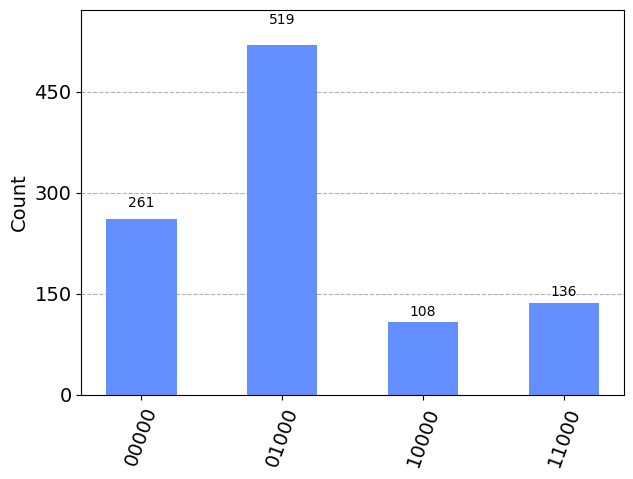

In [6]:
circ = transpile(circuit2, aer_sim)
result = aer_sim.run(circ,noise_model=noise_model).result()
counts = result.get_counts(circ)
plot_histogram(counts)